In [4]:
import requests
import zipfile
import os
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import torch
import glob


In [2]:

def download_file_from_google_drive(id, destination):
    def get_confirm_token(response):
        for key, value in response.cookies.items():
            if key.startswith('download_warning'):
                return value

        return None

    def save_response_content(response, destination):
        CHUNK_SIZE = 32768

        dir_path = '/'.join(destination.split('/')[:-1])
        
        Path(dir_path).mkdir(parents=True, exist_ok=True)
        
        with open(destination, "wb") as f:
            for chunk in response.iter_content(CHUNK_SIZE):
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)

    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)   


In [ ]:
# Downlaod Data Science Bowl data-set from drive

file_id = '1UBwI7Q1oi0bdwNVSvf6gCchiKE-IjG0b'
destination = 'data/temp/data_science_bowl.zip'
download_file_from_google_drive(file_id, destination)


In [ ]:

# Unzip archive to temp

with zipfile.ZipFile('data/temp/data_science_bowl.zip', 'r') as zip_ref:
    zip_ref.extractall('data/temp/')

# Remove temp archive    
os.remove('data/temp/data_science_bowl.zip')

In [ ]:
with zipfile.ZipFile('data/temp/stage1_train.zip', 'r') as zip_ref:
    Path('data/data_science_train').mkdir(parents=True, exist_ok=True)
    zip_ref.extractall('data/data_science_train')

data\data_science_train\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\images\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png


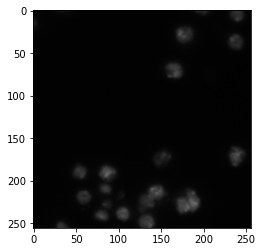

In [11]:

size_list = []

for filepath in glob.iglob(r'data\data_science_train\*\images\*.png'):
#     print(filename)
    img = Image.open(filepath)
    if img.size not in size_list:
        size_list.append(img.size)
        
    print(filepath)    
    break 
plt.imshow(img)
plt.show()

In [26]:
import torchvision.transforms as T

# Define image transformer
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor()])

inp = trf(img).unsqueeze(0)

print(img.size)
print(inp.size())
# inp = trf(img)
# plt.imshow(img)
# plt.show()
# plt.imshow(inp.permute(1,2,0))
# plt.show()

(360, 360)
torch.Size([1, 4, 224, 224])


In [21]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

In [27]:
fcn(inp)

RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[1, 4, 224, 224] to have 3 channels, but got 4 channels instead